In [157]:
#!pip install nba_api

I would like to create some visualizations that can give someone an idea of how a game was played at a glance using NBA py package

In [232]:
import pandas as pd
import nba_api as nba
from nba_api.stats.endpoints import commonplayerinfo
from nba_api.stats.endpoints import playbyplay
from nba_api.stats.endpoints import scoreboard
from nba_api.stats.endpoints import boxscoreadvancedv2
from nba_api.stats.endpoints import boxscoreusagev2
from nba_api.stats.endpoints import boxscoretraditionalv2 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
sns.set(style="whitegrid")
# Basic Request
#player_info = commonplayerinfo.CommonPlayerInfo(player_id=2544)

In [50]:
player_info.player_headline_stats.get_data_frame()

,PLAYER_ID,PLAYER_NAME,TimeFrame,PTS,AST,REB,PIE
0,2544,LeBron James,2019-20,23.3,9.5,6.3,0.205


In [225]:
boxadv=boxscoreadvancedv2.BoxScoreAdvancedV2(game_id=gameid).player_stats.get_data_frame().fillna(0)
boxadv.head()
box = boxscoretraditionalv2.BoxScoreTraditionalV2(game_id=gameid).player_stats.get_data_frame().fillna(0)
box.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,0021900060,1610612765,DET,Detroit,203503,Tony Snell,F,,18:49,2.0,...,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,6.0,-16.0
1,0021900060,1610612765,DET,Detroit,202693,Markieff Morris,F,,32:08,7.0,...,0.0,5.0,5.0,2.0,0.0,0.0,2.0,2.0,16.0,-13.0
2,0021900060,1610612765,DET,Detroit,203083,Andre Drummond,C,,35:19,10.0,...,8.0,14.0,22.0,3.0,0.0,1.0,5.0,4.0,21.0,-22.0
3,0021900060,1610612765,DET,Detroit,1628379,Luke Kennard,G,,26:38,1.0,...,0.0,1.0,1.0,7.0,0.0,0.0,1.0,1.0,3.0,-25.0
4,0021900060,1610612765,DET,Detroit,204025,Tim Frazier,G,,21:48,3.0,...,0.0,1.0,1.0,5.0,1.0,0.0,2.0,3.0,7.0,-5.0


In [209]:
def minute_conversion(minutes):
    return int(minutes.split(':')[0])+int(minutes.split(':')[1])/60


In [218]:
usage = boxadv[['TEAM_ID','TEAM_ABBREVIATION','PLAYER_NAME','MIN','USG_PCT']]
usage=usage[usage['MIN']!=0]
usage_raps=usage[(usage['TEAM_ID']==1610612761)]
usage_raps.loc[:,'MIN']=usage_raps.loc[:,'MIN'].apply(minute_conversion)
usage_raps

,TEAM_ID,TEAM_ABBREVIATION,PLAYER_NAME,MIN,USG_PCT
12,1610612761,TOR,OG Anunoby,36.683333,0.145
13,1610612761,TOR,Pascal Siakam,30.266667,0.343
14,1610612761,TOR,Marc Gasol,14.766667,0.118
15,1610612761,TOR,Kyle Lowry,37.800000,0.207
16,1610612761,TOR,Fred VanVleet,30.283333,0.164
17,1610612761,TOR,Serge Ibaka,31.983333,0.261
18,1610612761,TOR,Norman Powell,28.650000,0.175
19,1610612761,TOR,Patrick McCaw,23.000000,0.115
20,1610612761,TOR,Chris Boucher,4.066667,0.222
21,1610612761,TOR,Terence Davis,1.250000,0.000


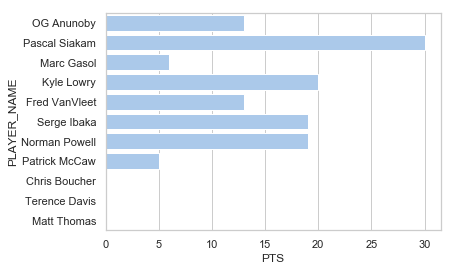

In [233]:
pts = box[['TEAM_ID','TEAM_ABBREVIATION','PLAYER_NAME','MIN','PTS']]
pts_raps = pts[(pts['TEAM_ID']==1610612761) & (pts['MIN']!=0) ]
pts_raps

sns.set_color_codes("pastel")
sns.barplot(x="PTS", y="PLAYER_NAME", data=pts_raps,
            label="Total", color="b")

In [152]:

now = datetime.datetime.now()+ timedelta(days=-2)
league_scores = scoreboard.Scoreboard(game_date=now).game_header.get_data_frame()
#Raps Team_ID = 1610612761
gameid = league_scores.loc[(league_scores['HOME_TEAM_ID']==1610612761) | (league_scores['VISITOR_TEAM_ID']==1610612761),'GAME_ID'].values[0]
pbp = playbyplay.PlayByPlay(game_id=gameid).play_by_play.get_data_frame()
game_score = pbp.loc[pbp['EVENTMSGTYPE']==1, ['PCTIMESTRING','PERIOD','SCOREMARGIN']].copy()
#clean up the data
game_score.loc[game_score['SCOREMARGIN']=='TIE','SCOREMARGIN']=0
game_score=game_score.fillna(0)
#ax = sns.lineplot(x="PCTIMESTRING", y="SCOREMARGIN", data=score)

In [156]:
pbp['PERIOD'].max()

4

DataError: No numeric types to aggregate

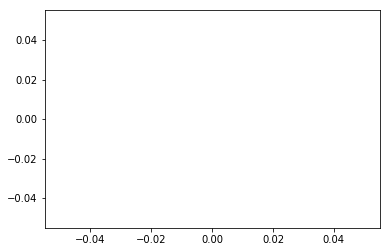

In [9]:
import requests
from lxml.html import fromstring
def get_proxies():
    url = 'https://free-proxy-list.net/'
    response = requests.get(url)
    print(response)
    parser = fromstring(response.text)
    proxies = set()
    for i in parser.xpath('//tbody/tr')[:10]:
        if i.xpath('.//td[7][contains(text(),"yes")]'):
            #Grabbing IP and corresponding PORT
            proxy = ":".join([i.xpath('.//td[1]/text()')[0], i.xpath('.//td[2]/text()')[0]])
            proxies.add(proxy)
    return proxies

In [12]:
proxies = get_proxies()
print(proxies)
#boxscore_summary = game.BoxscoreSummary("0021600457")
#print(boxscore_summary.game_summary())

<Response [200]>
{'201.62.56.49:35816', '157.119.117.129:35522', '104.148.46.101:3121', '186.159.2.241:43459', '3.0.61.137:8118', '104.148.46.85:3121', '185.244.192.119:6112', '118.70.12.171:53281', '202.179.7.158:23500', '186.47.41.146:53281'}


KeyboardInterrupt: 

In [ ]:
#Score difference by minute
#Line chart with score difference. Bottom of chart is home team, top of chart is away team.

In [ ]:
#Usage Rate + Minutes - spider chart? Radar Chart?

In [ ]:
#Points overlayed on PPG per player, 
#maybe a horizintal bar chart with top X players and their points in the game
#Expand to Rebounds and other key stats

In [ ]:
#Pace

In [ ]:
#True Shooting %

In [ ]:
#Network of assists?